<a href="https://colab.research.google.com/github/Fehl/NLP-Rag_QueryRouting/blob/main/Seminario_Pratico_NLP_Q2_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/rags-with-query-routing-5552e4e41c54

#How to Build Helpful RAGs with Query Routing

#1. Introdução: Definição de Termos e Abordagens

Este notebook implementa técnicas para a construção de Retrieval-Augmented Generations (RAGs) utilizando roteamento de consultas, conforme descrito no artigo "How to Build Helpful RAGs with Query Routing" publicado em Towards Data Science.

#1.1 O que é Query Routing?

 Em suma, é o processo de direcionar consultas ou perguntas para o recurso ou componente mais adequado dentro de um sistema complexo. Em sistemas que utilizam Modelos de Linguagem Grande (LLMs), LangChain, ou outras arquiteturas de recuperação e geração de informações, o Query Routing é uma técnica crucial para otimizar o desempenho e a precisão das respostas.

 * Identificação da Consulta: Quando uma consulta ou pergunta é recebida, o sistema primeiro a analisa para entender o seu tipo, contexto, e o tipo de informação que é necessário para responder.

* Roteamento para o Recurso Apropriado: Com base na análise, o sistema direciona a consulta para o recurso mais adequado. Isso pode incluir:

    * Base de Dados: Se a consulta se refere a informações factuais específicas, pode ser direcionada a um banco de dados estruturado.
    * Documentos: Para consultas que precisam de contexto ou informações mais detalhadas, pode ser direcionada a uma coleção de documentos ou uma base de conhecimento.
    * Modelos de Linguagem: Se a consulta envolve análise semântica complexa ou geração de texto, pode ser roteada para um modelo de linguagem.
    * Serviços Externos: Em alguns casos, pode ser necessário buscar dados em serviços externos, APIs, ou fontes de dados online.

* Processamento e Geração de Resposta: Após o roteamento, o recurso ou componente apropriado processa a consulta e gera uma resposta. Em alguns casos, isso pode envolver uma combinação de respostas, onde os resultados de diferentes fontes são integrados para fornecer uma resposta completa.

#1.2 Abordagens
O artigo explora três diferentes abordagens para direcionar consultas a base de dados mais apropriada:

# Layman's Approach (Abordagem leiga)
Abordagem mais simples. Cria-se vetores de palavras-chave para rotear a busca para uma base de dados. Então, verifica se existem palavras-chave no prompt, caso houver, redireciona a busca para base de dados correta.
<br>O problema dessa abordagem é caso exista palavras escritas de forma incorreta no prompt, ou caso seja um sinônimo da palavra armazenada no vetor de palavras chave. Nesses casos, o roteamento não será realizado de forma correta.

# Roteamento baseado em LLM
Utiliza LLM para decidir qual base de dados será consultada com base na entrada do usuário. Essa abordagem resolve o problema da abordagem anterior, pois o LLM é capaz de corrigir erros da entrada.

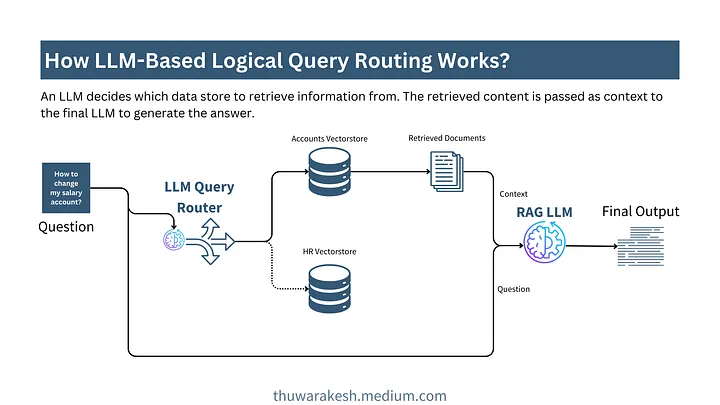

A desvantagem desse método ocorre em casos nichados, devido o LLM não ser treinado específicamente para uma empresa ou assunto. Por exemplo, uma empresa pode usar siglas para citar um produto da própria empresa, nesse caso, o LLM não será capaz de redirecionar a busca para a base de dados correta.

# Roteamento semântico de consultas
Essa abordagem depende de prompts pré-definidos que serão utilizados como comparação ao prompt de entrada do usuário. Após a comparação dos prompts, será escolhido o prompt com maior similaridade semântica ao prompt de entrada, então será definido a base de dados que será feita a busca. Essa abordagem resolve o problema de termos específicos de uma empresa, visto que os prompts pré-definidos também possuem esses termos.

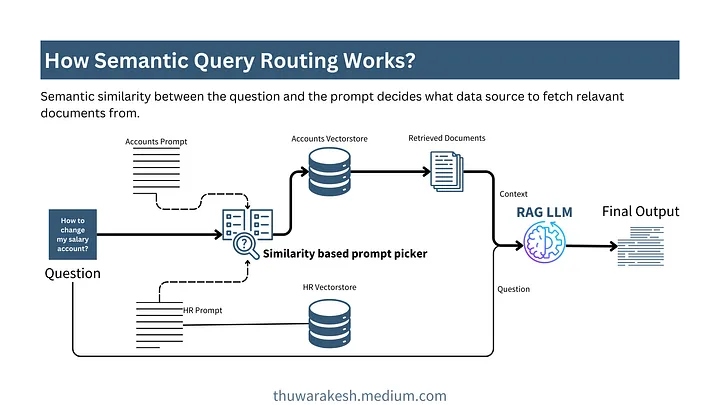

Um problema dessa abordagem é que nem sempre o prompt de maior similaridade representa o contexto do prompt de entrada, pois pequenas palavras chaves podem alterar completamente o sentido de um prompt, porém mantendo uma pontuação alta na comparação por similaridade, causando um redirecionamento errado.




#2. Instalação de Bibliotecas:

 Essas bibliotecas são essenciais: LangChain, ChromaDB e LangChain_OpenAI. LangChain fornece uma infraestrutura robusta para criar pipelines que integram modelos de linguagem com diversos componentes, como mecanismos de recuperação de informações e bancos de dados. Isso é crucial para construir sistemas que combinam geração e recuperação de texto de maneira eficiente. ChromaDB é um banco de dados orientado a vetores que armazena embeddings de texto, permitindo uma recuperação rápida e precisa de informações com base na similaridade. Esse recurso é fundamental para otimizar o componente de recuperação em sistemas de Retrieval-Augmented Generation (RAG).

In [ ]:
!pip install langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 587.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.2/396.2 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 20.7 MB/s eta 0:00:00


In [ ]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 9.6 MB/s eta 0:00:0

#2.1 Desembrulhando o Código:

In [ ]:
import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass() #Registramos nossa Key da OpenAI

··········


In [ ]:
from langchain_community.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_community.vectorstores import Chroma

def create_retriever_from_file(file_name):
    data = TextLoader(file_name).load()
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=200, chunk_overlap=20)
    splits = text_splitter.split_documents(data)
    vectorstore = Chroma.from_documents(splits, embedding=OpenAIEmbeddings())
    return vectorstore.as_retriever()

hr_retriever = create_retriever_from_file("sample_documents.txt")
accounts_retriever = create_retriever_from_file("sample_documents.txt")

Neste trecho, o autor nos fornece um exemplo de escolha da rota de recolha de dados por meio de palavras-chaves. Este método possui suas desvantagens visto que caso haja algum erro de digitação ou alguma palavra relacionada mas que não esteja na lista, ele não irá fazer a rota para a fonte de dados correta - o que pode ser corrigido com a sugestão de utilizar algum Aprendizado de Máquina pré treinado. Entretanto, ainda falha em comparação à utilização de RAGs com Query Routing - um método que aprimora o anterior.

Por meio da função de busca, também há a limpeza dos dados e formatação destes para que a busca seja de forma eficiente.

In [ ]:
# Define keywords for HR and Finance queries
HR_KEYWORDS = [
    "benefits",
    "performance",
    "evaluations",
    "leave",
    "policies",
    "human resources",
    "HR",
]
ACCOUNTS_KEYWORDS = [
    "salary",
    "payroll",
    "expense",
    "reimbursements",
    "finance",
    "financial",
    "pay",
]


# Function to route query
def route_query(query: str) -> str:

    # Convert query to lowercase for case-insensitive matching
    query_lower = query.lower()

    # Check if any HR keywords are in the query
    if any(keyword in query_lower for keyword in HR_KEYWORDS):
        return hr_retriever

    # Check if any Finance keywords are in the query
    elif any(keyword in query_lower for keyword in ACCOUNTS_KEYWORDS):
        return accounts_retriever

    # If no keywords are matched, return a default response
    else:
        return "Unknown category, please refine your query."

# Example queries
queries = [
    "What are the leave policies?",
    "How do I apply for performance evaluations?",
    "Can I get a breakdown of my salary?",
    "Where do I submit expense reimbursements?",
    "Tell me about the HR benefits available.",
]

# Route each query and retrieve the response
for query in queries:
    retriever = route_query(query)
    response = retriever.invoke(query)[0].page_content

    print(f"Query: {query}" + "\n" + f"Response: {response}" + "\n")

Query: What are the leave policies?
Response: Employee Records - September 2024

Query: How do I apply for performance evaluations?
Response: Employee ID	Name	Department	Position	Date of Joining	Salary	Performance Rating
E001	John Doe	HR	HR Manager	2021-06-01	$6,000	Excellent
E002	Jane Smith	IT	Software Engineer	2020-09-15	$5,500	Good

Query: Can I get a breakdown of my salary?
Response: Employee ID	Name	Department	Position	Date of Joining	Salary	Performance Rating
E001	John Doe	HR	HR Manager	2021-06-01	$6,000	Excellent
E002	Jane Smith	IT	Software Engineer	2020-09-15	$5,500	Good

Query: Where do I submit expense reimbursements?
Response: A002	Expenses	Q3 2024	$50,000	$20,000	$15,000	$55,000
A003	Assets	Q3 2024	$300,000	$70,000	$40,000	$330,000
A004	Liabilities	Q3 2024	$150,000	$30,000	$20,000	$160,000

Query: Tell me about the HR benefits available.
Response: Employee ID	Name	Department	Position	Date of Joining	Salary	Performance Rating
E001	John Doe	HR	HR Manager	2021-06-01	$6,000	Exc

Podemos corrigir o problema anterior utilizando Large Language Models (LLM) para dirigir a rota de dados corretamente. Aqui está o exemplo utilizando LLM da OpenAI:

In [ ]:

from pydantic import BaseModel, Field
from typing import Optional, Literal

from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough



# Section 1: Setup LLM and Configure Structured Output
class DataSource(BaseModel):
    datasource: Optional[Literal["hr", "accounts"]] = Field(
        title="Organization data source",
        description="Our organization bot has two data sources: HR and accounts",
    )

llm = ChatOpenAI()
structured_routing_llm = llm.with_structured_output(DataSource)



# Section 2: Routing Prompt Template
routing_prompt_template = ChatPromptTemplate.from_template("""
    You are good at routing questions to either accounts or HR departments.
    Which is the best department to answer the following question?
    If you can't determine the best department, respond with "I don't know".
    question: {question}
    department:
""")
routing_chain = routing_prompt_template | structured_routing_llm



# Section 3: Define Retriever Based on the Routed Department
def get_retriever(question):
    datasource = routing_chain.invoke(question).datasource

    hr_prompt_template = ChatPromptTemplate.from_template("""
        You are a human resources professional at Fictional, Inc.
        Respond to the following employee question in the context provided.
        If you can't answer the question with the given context, please say so.
        context: {context}
        question: {question}
    """)

    accounts_prompt_template = ChatPromptTemplate.from_template("""
        You are an accounts professional at Fictional, Inc.
        Respond to the following employee question in the context provided.
        If you can't answer the question with the given context, please say so.
        context: {context}
        question: {question}
    """)

    if datasource == "hr":
        print("HR")
        return hr_retriever, hr_prompt_template
    else:
        print("Accounts")
        return accounts_retriever, accounts_prompt_template

# Section 4: Answer the Question Using the Appropriate Chain
def answer_the_question(question: str) -> str:
    routing_output = routing_chain.invoke(question)
    retriever, prompt_template = get_retriever(routing_output)

    chain = (
        {"question": RunnablePassthrough(), "context": retriever}
        | prompt_template
        | llm
        | StrOutputParser()
    )

    return chain.invoke(question)

# Example usage
answer_the_question("How do I change my salary deposit information?")


Accounts


'Based on the provided context, which includes employee records for John Doe and Jane Smith at Fictional, Inc., there is no specific information regarding changing salary deposit information. This would typically be handled by the HR department or payroll team within the company. I recommend reaching out to your HR department or payroll team for guidance on how to update your salary deposit information.'

A abordagem anterior, baseada em LLM, sofre da desvantagem para casos nichados em que palavras específicas são usadas no prompt.
<br>Esse problema pode ser resolvido utilizando o roteamento por comparação semântica, em que prompts são pré-definidos e comparados com o prompt de entrada do usuário, desse modo, pode-se pré-definir prompts que contém as palavras específicas de um certo contexto para que após a comparação, ocorra o roteamento corretamente.
<br>Segue a implementação dessa abordagem:

In [ ]:
from langchain import PromptTemplate
from sklearn.metrics.pairwise import cosine_similarity
from langchain_openai import OpenAIEmbeddings as openai_embeddings
from langchain_core.runnables import RunnableLambda

# Section 1: Defining the prompts for each data source and embedd them.
hr_template = """You're a human resources professional at Fictional, Inc.
Use the context below to answer the question that follows.
If you need more information, ask for it.
If you don't have enough information in the context to answer the question, say so.
context: {context}
question: {query}
Answer:
"""

accounts_template = """You're an accounts manager at Fictional, Inc.
Use the context below to answer the question that follows.
If you need more information, ask for it.
If you don't have enough information in the context to answer the question, say so.
context: {context}
question: {query}
Answer:
{query}"""


prompt_templates = [hr_template, accounts_template]
embeddings_instance = OpenAIEmbeddings()
prompt_embeddings = embeddings_instance.embed_documents(texts = prompt_templates)


# Section 3: Create the similarity-based prompt picker
def find_most_similar_prompt(input):
    # Embed the question
    query_embedding = embeddings_instance.embed_query(input["query"])

    # Pick the most similar prompt
    similarity = cosine_similarity([query_embedding], prompt_embeddings)[0]
    best_match = prompt_templates[similarity.argmax()]


    print(
        "Directing to the Accounts Department"
        if best_match == accounts_template
        else "Directing to the HR Department"
    )

    # Also pick the retriever
    retriever = accounts_retriever if best_match == accounts_template else hr_retriever

    # Create the prompt template with the choosen prompt and retriever
    prompt_template =  PromptTemplate.from_template(
        best_match, partial_variables={"context": retriever}
    )

    return prompt_template


# Section 4: Define the full RAG chain
chain = (
    {"query": RunnablePassthrough()}
    | RunnableLambda(find_most_similar_prompt)
    | ChatOpenAI()
    | StrOutputParser()
)


# Execute the chain
print(
    chain.invoke(
        """
        I need more budget to buy the software we need.
        What should I do?
        """
    )
)




Directing to the Accounts Department
As the accounts manager at Fictional, Inc., you will need to follow the company's budgeting process to request additional funds for purchasing the software needed. This typically involves putting together a budget proposal outlining the costs of the software, the benefits it will bring to the company, and how it aligns with the company's overall goals. You may need to present this proposal to your superiors or the finance department for approval. If you require assistance in preparing the budget proposal or need more information on the budgeting process at Fictional, Inc., please let me know.
